## Scatter(산점도) Plot 살펴보기
- 용도 : 2개 이상의 컬럼들의 관계 정도를 시각화 하는 그래프
- corr()


In [3]:
import pandas as pd
import numpy as np

In [4]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])
df.corr(method=histogram_intersection)

,dogs,cats
dogs,1.0,0.3
cats,0.3,1.0


In [5]:
df

,dogs,cats
0,0.2,0.3
1,0.0,0.6
2,0.6,0.0
3,0.2,0.1


<Axes: xlabel='dogs', ylabel='cats'>

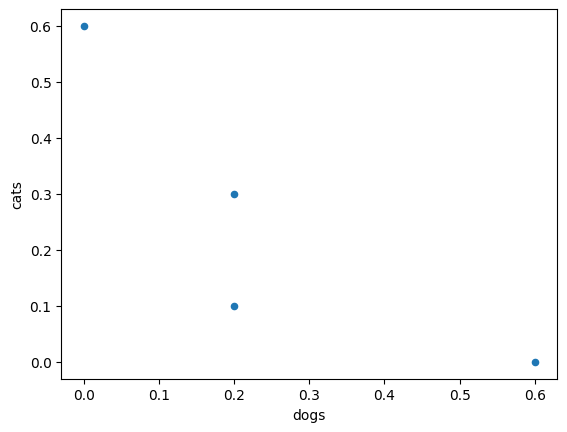

In [6]:
df.plot.scatter(x='dogs', y='cats')

In [12]:
file = './auto-mpg.data'
mpgDF = pd.read_csv(file, sep="\s+", names=['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model year', 'origin', 'car name'])

mpgDF.tail()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [43]:
mpgDF.info()
mpgDF['horsepower'] = mpgDF['horsepower'].apply(lambda x : pd.to_numeric(x,errors="coerce"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4888\1959023209.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  mpgDF['horsepower'] = mpgDF['horsepower'].apply(lambda x : pd.to_numeric(x,errors="coerce"), convert_dtype='float32')


<Axes: xlabel='weight', ylabel='horsepower'>

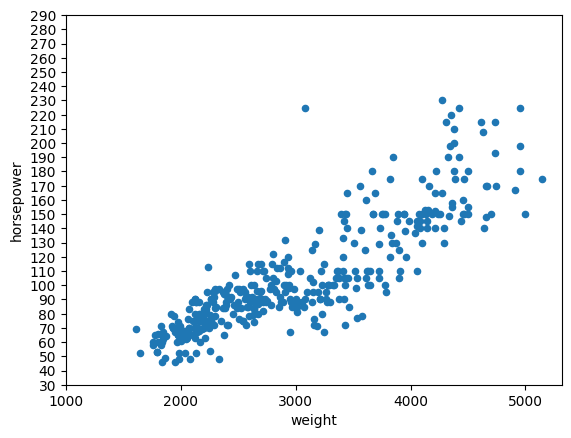

In [36]:
# mpgDF.plot.scatter(x='weight', y='horsepower' , xlabel='weight', ylabel='horsepower', xticks = np.arange(1000, 6000, 1000), yticks = np.arange(30, 300, 10))
mpgDF.corr(numeric_only=True)
# scatter with correlation line
mpgDF.plot.scatter(x='weight', y='horsepower', xlabel='weight', ylabel='horsepower', xticks = np.arange(1000, 6000, 1000), yticks = np.arange(30, 300, 10))

In [44]:
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


<Axes: xlabel='acceleration', ylabel='horsepower'>

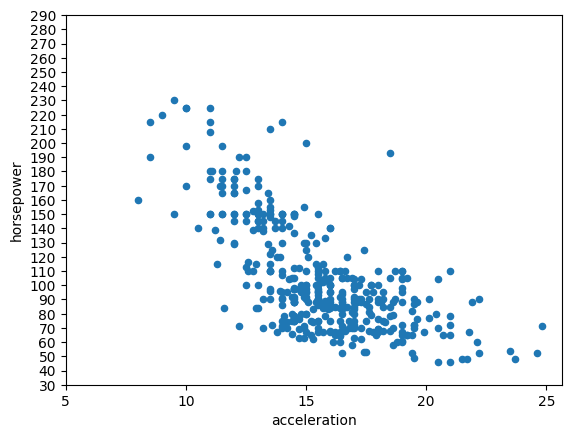

In [45]:
mpgDF.plot.scatter(x='acceleration', y='horsepower', xlabel='acceleration', ylabel='horsepower', 
                    xticks = np.arange(5, 30, 5), yticks = np.arange(30, 300, 10))

- 실제 데이터의 값 종류 즉 고유값 확인 => unique() / nunique()
    * 각 컬럼의 이상한 값 즉, 이상치 확인
    * 각 컬럼의 값의 종류 및 범위
    * 각 컬럼의 실제 데이터 타입

In [37]:
for col in mpgDF.columns:
    print(f"[{col}]=======")
    print(mpgDF[col].nunique(), mpgDF[col].unique(), sep='\n', end='\n\n')

[mpg]=======
129
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

[cylinders]=======
5
[8 4 6 3 5]

[displacement]=======
82
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114

In [38]:
mpgDF['origin'].nunique(dropna=False), mpgDF['origin'].unique()

(3, array([1, 3, 2], dtype=int64))

(5) 데이터 전처리 <hr>
- 결측치 체크 => 꼭 NaN 이 아닐수 있음
- 중복값 체크 
- 이상치 체크 => 정말 컬럼의 범위를 벗어난 값, 잘못 입력한 값
- 데이터 표준화 => 자료형, 데이터 단위 일치
- 데이터 정규화 => 데이터의 크기 일치

In [39]:
mpgDF.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

(5-1) 결측치 체크 및 처리 ==> 이상한 값 즉 이상치 NaN으로 변환 후 처리


In [41]:
mpgDF["horsepower"].fillna(mpgDF["horsepower"].mean(), inplace=True)
mpgDF.isnull().sum()
mpgDF

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64